# ACML2020 Tutorial: Recent Advances in Bayesian Optimization
# http://vu-nguyen.org/BayesOptTutorial_ACML20


# Dr Vu Nguyen vu@ieee.org

# Let define our own black-box function to be optimized with MiniBO

In [1]:
from mini_bo import BayesOpt,visualization
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


# Customize your own function

In [2]:
class YourFunction:
    def __init__(self):
        self.bounds = np.asarray([         # define the search range for each variable
                                [-5,10], # variable 1: min=-5 ; max=10
                                  [0,15] # variable 2: min=0; max=15
                                 ])
            
        self.input_dim = self.bounds.shape[0] # this is 2

        # do we want to maximize the function or minimize ?
        self.ismax=-1  # set -1 if we want to minimize
        
        self.name='MiniBO'         # set the name of your function
        
    # evaluate y=f(X)
    def evaluate_single_fx(self,X): # this is actually a Branin function
        X = np.reshape(X,self.input_dim)
        x1,x2=X[0],X[1]
     
        a,b=1,5.1/(4*np.pi**2)
        c,r,s=5/np.pi,6,10
        t=1/(8*np.pi)
        y=a*(x2-b*x1*x1+c*x1-r)**2+s*(1-t)*np.cos(x1)+s    
      
        return y*self.ismax # return the (-1) * fx for minimization problem
    
    def func(self,X):
        X=np.asarray(X)        
       
        if len(X.shape)==1: # 1 data point
            fx=self.evaluate_single_fx(X)
        else: # multiple data points
            fx=np.apply_along_axis( self.evaluate_single_fx,1,X)
            
        return fx  

# Init the black-box function

In [3]:
myfunction=YourFunction()

# Specify Bayesian optimization

In [4]:
acq_name='ei'
bo=BayesOpt(myfunction.func,myfunction.bounds,acq_name=acq_name,verbose=1)

C:\Users\Lenovo\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Initialize BO using 3*dim number of observations

In [5]:
bo.init(n_init_points=3*myfunction.input_dim)

# Run for 10*dim iterations

In [6]:
NN=15*myfunction.input_dim
for index in range(0,NN):
    bo.select_next_point()

    print(tabulate([[ index,np.round(bo.X_ori[-1],3), np.round(bo.Y_ori[-1],3), np.round(bo.Y_ori.max(),3)]], \
               headers=['Iter','Selected x', 'Output y=f(x)', 'Best Observed Value']))

print("==================================================================================")
idxMax=np.argmax(bo.Y_ori)
print(tabulate([[ np.round(bo.X_ori[idxMax],3), np.round(bo.Y_ori[idxMax],3)]], \
           headers=['Best found x', 'Best found f(x)']))   

estimated lengthscale [0.0353949]
  Iter  Selected x         Output y=f(x)    Best Observed Value
------  ---------------  ---------------  ---------------------
     0  [-0.862  5.967]          -18.501                -18.501
  Iter  Selected x         Output y=f(x)    Best Observed Value
------  ---------------  ---------------  ---------------------
     1  [-1.818  7.607]          -10.586                -10.586
  Iter  Selected x         Output y=f(x)    Best Observed Value
------  ---------------  ---------------  ---------------------
     2  [-2.858 10.062]           -3.158                 -3.158
  Iter  Selected x         Output y=f(x)    Best Observed Value
------  ---------------  ---------------  ---------------------
     3  [-4.881 10.904]          -46.923                 -3.158
  Iter  Selected x         Output y=f(x)    Best Observed Value
------  ---------------  ---------------  ---------------------
     4  [-1.63   9.679]           -9.986                 -3.158
  Iter

# Plot the performance

Text(0.5, 1.0, 'Performance')

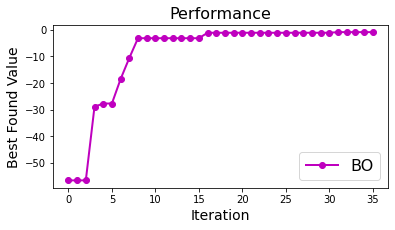

In [7]:
fig=plt.figure(figsize=(6, 3))
myYbest=[bo.Y_ori[:idx+1].max() for idx,val in enumerate(bo.Y_ori)]
plt.plot(range(len(myYbest)),myYbest,linewidth=2,color='m',linestyle='-',marker='o',label='BO')


plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Best Found Value',fontsize=14)
plt.legend(prop={'size': 16})
plt.title('Performance',fontsize=16)

# Run Random Search Baseline

In [8]:
# number of points
n_point=len(bo.Y_ori) 

# uniformly select the input
X_rand = np.random.uniform(myfunction.bounds[:, 0], myfunction.bounds[:, 1],size=(n_point, myfunction.input_dim))

# evaluate the black-box function
Y_rand=myfunction.func(X_rand)


# Comparing Bayes Opt with Random Search

Text(0.5, 1.0, 'Performance')

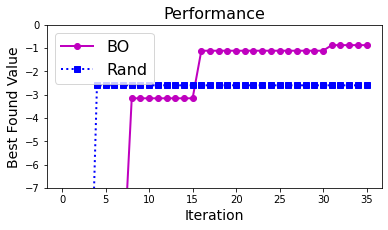

In [9]:
fig=plt.figure(figsize=(6, 3))

myYbest_BO=[bo.Y_ori[:idx+1].max() for idx,val in enumerate(bo.Y_ori)]
plt.plot(range(len(myYbest_BO)),myYbest_BO,linewidth=2,color='m',linestyle='-',marker='o',label='BO')

myYbest_Rand=[Y_rand[:idx+1].max() for idx,val in enumerate(Y_rand)]
plt.plot(range(len(myYbest_Rand)),myYbest_Rand,linewidth=2,color='b',linestyle=':',marker='s',label='Rand')

plt.ylim([-7,0])
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Best Found Value',fontsize=14)
plt.legend(prop={'size': 16})
plt.title('Performance',fontsize=16)

# Most of the time, BayesOpt will outperform Random Search